<a href="https://colab.research.google.com/github/EsamSharaf/Body-Fat-Prediction/blob/main/body_fat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**







**This task aims for predicting body fat percentage from a group of input features. Measuring fat percentage requires many body measurements. This is an attempt to build a model based on the input data to estimate the Body Fat with the sufficient number of features to do that, which could make fat percetage estimation more convenient**

**The dataset comprises a set of features of 252 men in order to estimate Body Fat Percentage.**


**The dataset contains the following features:**


**1. Density determined: body weight (mass)by body volume from underwater weighing.**

**2. Percent body fat (The target variable): total body mass times 100.from Siri's (1956) equation.**

**3. Age: the age of of the participant in years.**

**4. Weight: the age of of the participant in pounds (lbs).**

**5. Height: the height of the participant in inches.**

**6. Neck circumference in cm.**

**7. Chest circumference in cm.**

**8. Abdomen 2 circumference: at the level of the iliac crests, and anteriorly, at the umbilicus, laterally (cm).**

**9. Hip circumference in cm.**

**10. Thigh circumference in cm.**

**11. Knee circumference in cm.**

**12. Ankle circumference in cm.**

**13. Biceps (extended) circumference (cm)**

**14. Forearm circumference (cm)**

**15. Wrist circumference (cm)**

# **EDA**

In [286]:
# Import Libraries and Modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
import time
start = time.time()

In [287]:
# Read the CSV file using Pandas
df = pd.read_csv('bodyfat.csv')

# Chec the types of dataset's variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


**The dataset comprises 15 numeric variable, 0 Categorical variables**

**As the predicted variable is continous, regression models will be used for prediciting the body fat percentage.**

In [288]:
# Gett a glance at the variables 
df.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [289]:
# Some info about the numerical columns
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


**The table above shows that variables have different ranges. It is better to implement scaling in the preprocessing step**.

In [290]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

**No duplicated samples in the dataframe**

In [291]:
#check for null values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

**No Missing values in the dataset's variables**

**Ploting the relationships between the variable**  


**This helps in visualizing the relationship between pair of numerical variables (Independent vs Dependent). The magenta line represents the best-fit regression line.**

In [292]:
# Plot pair-plots for checking out the dependcy between features
#importlib.reload(matplotlib); importlib.reload(plt); importlib.reload(sns)
#sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.25}})
#plt.tight_layout()
#plt.show()

**As seem in the pairplot figure, Density and Body Fat have linear relationship as the projected points lie on along the best-fit regression line. Hence, a simple model (function) can map a value of independent variable to target value with minimum error.**

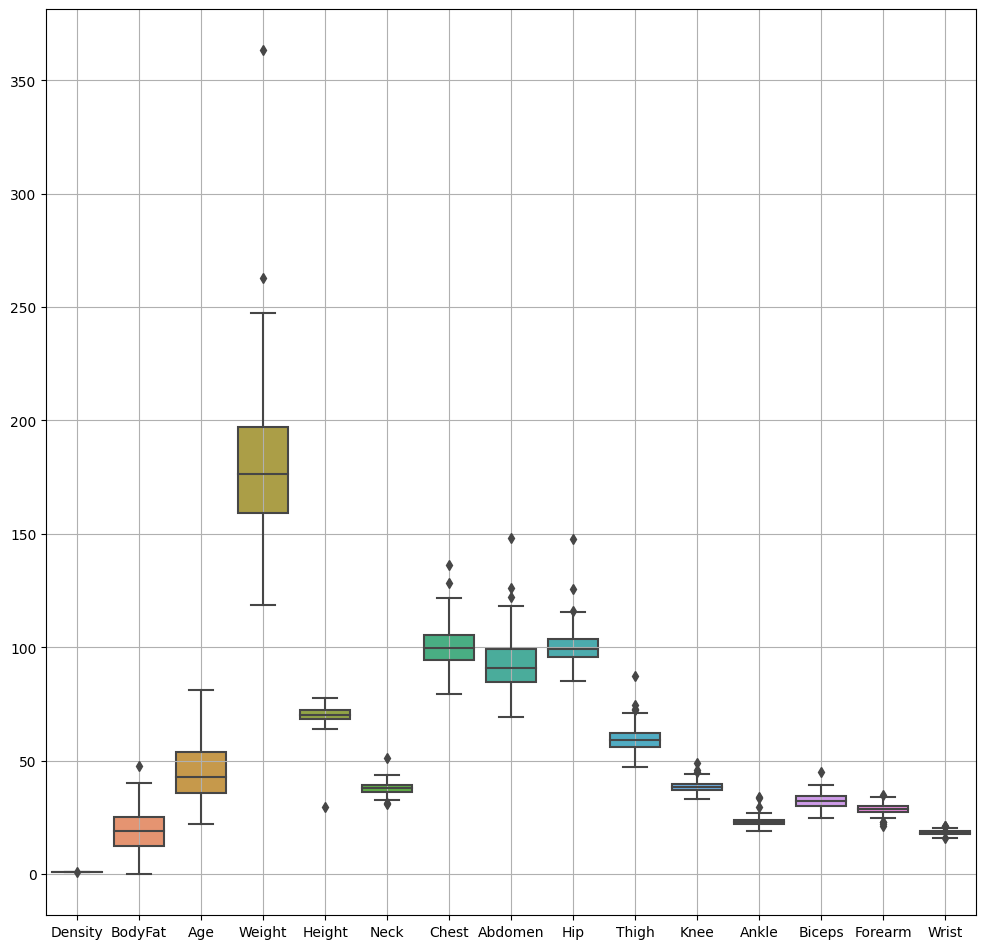

In [293]:
# Check for outliers in each variables by ploting the box plot
plt.figure(figsize=(12,12), facecolor='white')
sns.boxplot(data=df)
plt.grid()
plt.show()

**Pre-processing: Converting the height and weight to SI unit to have the same unit system like other features which are in cm**

In [294]:
df['Weight'] /= 2.2 # converting to kg
df['Height'] *= 2.5 # converting to cm
df['Height'] /= 100 # converting to m

# rounding the value to 1 decimal
df['Weight'] = round(df['Weight'], 2)
df['Height'] = round(df['Height'], 2)

**Visualising the linear relationship degree between the variables by using heatmap based on pearson correlation. Numbers falls in the range (-1, 1). Zero value means no correlation exists. By looking on Body Fat row (or column), it shows a variety of correlations between Body Fat and input features (i.e the predictors), the strongest relation is with Density feature.**

**Also, the heatmap shows multicolliearity exists between predictors. This could make the model output swingy, more biased and hard to interpret. This will be considered in the modelling part.**

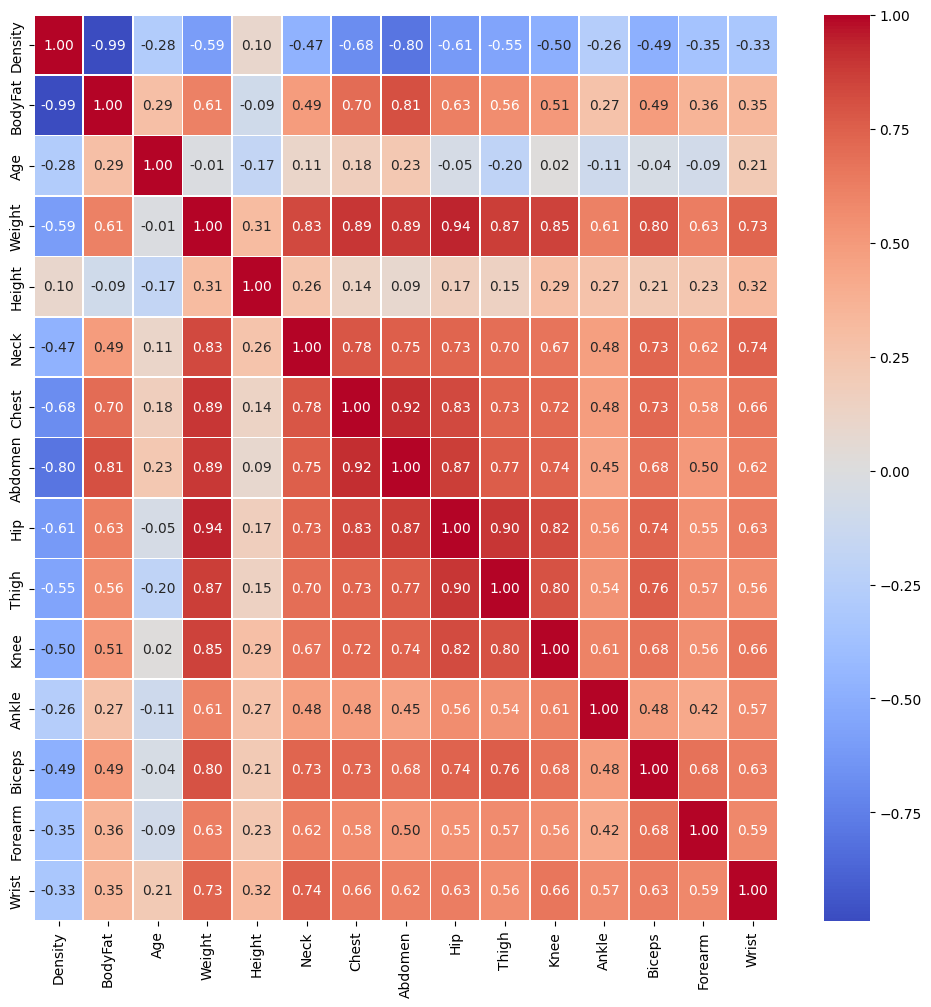

In [295]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method ='pearson'),annot=True,linewidth=0.5,fmt="0.2f", cmap = 'coolwarm')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


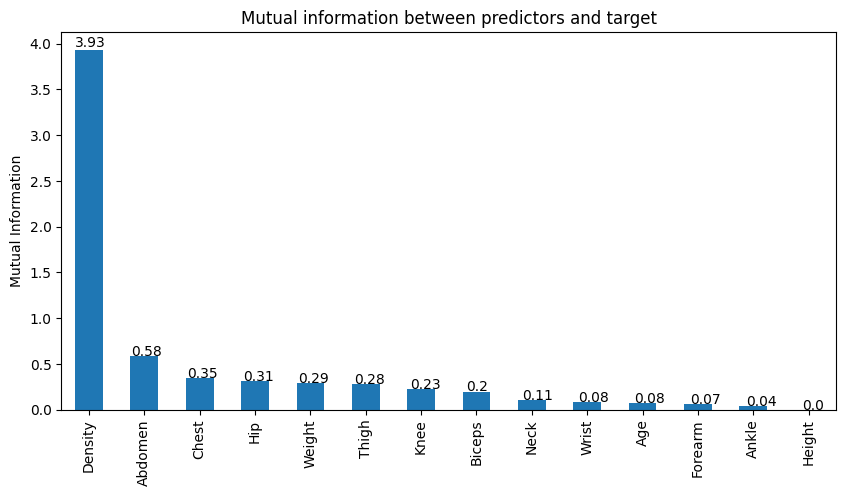

In [296]:
# check the Mutual Information (MI) score between features and BodyFat variable
from sklearn.feature_selection import mutual_info_regression
features = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee','Ankle', 'Biceps', 'Forearm', 'Wrist']
target_var = ['BodyFat']
discrete_vars = [False, True, False, False, False, False, False, False, False, False, False, False, False, False]
mi = mutual_info_regression(df.drop(target_var, axis = 1), df.drop(features, axis = 1), discrete_features=discrete_vars, random_state=42)
mi = pd.Series(mi)
mi.index = features
ax = mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")
plt.show()

**Mutual Information captures how much a variable can tell info about another variable- typically a taeget variable-. The above figure shows that Density can tell alot about Body Fat, while height tells hints nothing about Body Fat**

# **Data Cleaning**

**Removing the outliers (two options):**

**1. based oon Z-score value**

**2. based on stadanrd deviation**

**Choosing the second option to preserve more examples since the dataset is small**

In [297]:
# Method 1 Removing the ouliers using standard deviation method
'''
z = np.abs(stats.zscore(df, axis=0))
# Only keep rows in dataframe with all z-scores less than absolute value of 3 
df = df[(z<3).all(axis=1)]
'''

## Method 2: Clip the ouliers with acceptable value (Q1 - 1.5 * IQR for lower ...
##  limit or  Q3 + 1.5 * IQR for upper limit)

outlier_samples_list = []
for col in df.columns:
  Q3 = np.quantile(df[col], 0.75)
  Q1 = np.quantile(df[col], 0.25)
  IQR = Q3 - Q1
  #col_values = df.loc[:, col]
  for i in range(df[col].shape[0]):
    if df.loc[i, col] > (Q3 + 1.5 * IQR):
      outlier_samples_list.append(df.loc[i, :, ])
      df.loc[i, col] = (Q3 + 1.5 * IQR)
    elif df.loc[i, col] < (Q1 - 1.5 * IQR):
      outlier_samples_list.append(df.loc[i, :, ])
      df.loc[i, col] = (Q1 - 1.5 * IQR)
outlier_samples_df = pd.DataFrame(outlier_samples_list)
outlier_samples_df.drop_duplicates(inplace = True)

print(outlier_samples_df)
print('\n Number of Samples with outlier', outlier_samples_df.shape[0])

     Density  BodyFat   Age    Weight  Height     Neck     Chest  Abdomen  \
215   0.9950  47.5000  51.0   99.5500    1.60  41.2000  119.8000   122.10   
215   0.9979  47.5000  51.0   99.5500    1.60  41.2000  119.8000   122.10   
38    1.0202  35.2000  46.0  165.0700    1.81  51.2000  136.2000   148.10   
40    1.0217  34.5000  45.0  119.4300    1.72  43.2000  128.3000   126.20   
41    1.0250  32.9000  44.0   93.1800    0.74  36.6000  106.0000   104.30   
38    1.0202  35.2000  46.0  115.4625    1.81  51.2000  136.2000   148.10   
44    1.0814   7.7000  39.0   56.9300    1.70  31.5000   85.1000    76.00   
105   1.0578  18.0000  43.0   75.2300    1.71  31.1000   93.1000    87.30   
38    1.0202  35.2000  46.0  115.4625    1.81  43.9625  136.2000   148.10   
40    1.0217  34.5000  45.0  115.4625    1.72  43.2000  128.3000   126.20   
38    1.0202  35.2000  46.0  115.4625    1.81  43.9625  121.9125   148.10   
40    1.0217  34.5000  45.0  115.4625    1.72  43.2000  121.9125   126.20   

In [298]:
# Removing samples with Body Fat < 2% since it is unrealistic (i.e: error in input data)
df_clean = df[df["BodyFat"]>2]

In [299]:
# Check the cleaned dataset
df_clean.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055201,19.289350,44.944000,81.321260,1.75784,38.000350,100.86770,92.590600,99.836350,59.414000,38.597800,23.053600,32.303650,28.703000,18.234400
std,0.018570,8.191438,12.633101,12.242881,0.06637,2.281767,8.05556,10.170225,6.360306,4.886689,2.296152,1.396009,2.917935,1.945699,0.904305
min,0.997900,3.000000,22.000000,56.820000,1.56000,31.862500,83.40000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,23.250000,15.800000
25%,1.041400,12.600000,36.000000,72.445000,1.71000,36.400000,94.67500,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054800,19.250000,43.500000,80.340000,1.75500,38.000000,99.70000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,1.070050,25.300000,54.000000,89.550000,1.81000,39.475000,105.52500,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,1.099100,44.537500,81.000000,115.462500,1.94000,43.962500,121.91250,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000


**Some mean values have changed significantly after data cleaning like weight 178.92 (before data cleaning) 81.32 (after data cleaning)**

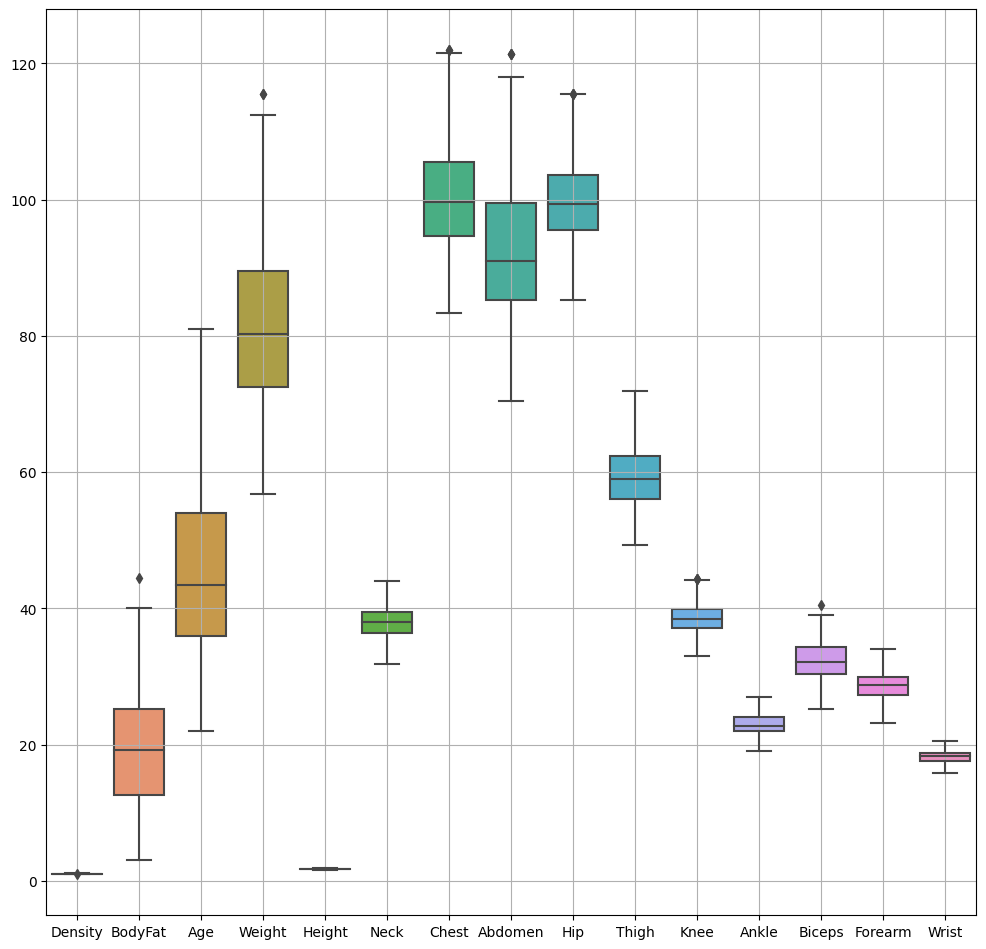

In [300]:
# Check variables after removing the outlier values (for removing outliers using standard deviation method)
plt.figure(figsize=(12,12), facecolor='white')
sns.boxplot(data=df_clean)
plt.grid()
plt.show()

In [301]:
# Check collinearity after removing outlier values (for removing outliers using standard deviation method)
'''
plt.figure(figsize=(12,12))
sns.heatmap(df_clean.corr(method ='pearson'),annot=True,linewidth=0.5,fmt="0.2f", cmap = 'coolwarm')
plt.show()
'''

'\nplt.figure(figsize=(12,12))\nsns.heatmap(df_clean.corr(method =\'pearson\'),annot=True,linewidth=0.5,fmt="0.2f", cmap = \'coolwarm\')\nplt.show()\n'

# ML Model

In [302]:
# Removing the target variable
X = df_clean.drop(['BodyFat'], axis = 1)

# Assign the target variable (i.e BodyFat) to Y
Y = df_clean['BodyFat']

In [303]:
# convet Y from dataframe data type to array
Y = Y.to_numpy().reshape(-1,1)

**Model 1: Implementing Linear Model with Density Feature Only since the EDA step has shown very high correlation and high mutual information between Density and BodyFat**

In [304]:
X = df_clean.drop(['BodyFat', 'Height', 'Ankle', 'Age', 'Wrist', 'Forearm', 'Neck', 'Biceps', 'Knee', 'Thigh', 'Weight', 'Hip', 'Chest','Abdomen'], axis = 1)


In [305]:
X.describe()

,Density
count,250.000000
mean,1.055201
std,0.018570
min,0.997900
25%,1.041400
50%,1.054800
75%,1.070050
max,1.099100


In [306]:
# The Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])
cvfolds = KFold(n_splits=4)
scores = cross_validate(pipeline.fit(X_train, Y_train), X_train, Y_train, cv = cvfolds, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)

# Training metrics
print('r2 score for the traning', scores['train_r2'])
print('Avergae r2 score for the traning acrros folds ', scores['train_r2'].mean())
# Testing metrics
print('r2 score for the validation', scores['test_r2'])
print('Avergae r2 score for the validation ', scores['test_r2'].mean())

r2 score for the traning [0.96295279 0.99091411 0.96854298 0.95996681]
Avergae r2 score for the traning acrros folds  0.9705941707444627
r2 score for the validation [0.99350024 0.88941525 0.97570191 0.99830056]
Avergae r2 score for the validation  0.964229488714534


In [307]:
print("Linear Regression intercept: ", pipeline['estimator'].intercept_)
print("Linear Regression coefficients: ", pipeline['estimator'].coef_)

Linear Regression intercept:  [19.3116875]
Linear Regression coefficients:  [[-8.18967983]]


**Therefore, the equation of Density-only linear regression model is:**

**$$\textrm{Body Fat} = -8.1897 \times \textrm{Density} + 19.3116875$$**

In [308]:
# Testig the Linear Model on the Testing Data(X_test)
pipeline.score(X_test, Y_test)

0.9991230713184147

**The model based on The Density has got near-perfect r2 score. This is expected based on pearson's correlation and mutual information steps done in EDA.**

**Model 2: Dropping Density Feature, Implementing Linear Model on all other Input Features. Since Density is highly correlated with BodyFat, This step to get to know how much accurate the model in its estimates without Density predictor. In other words, how much the model relys on Density.**

In [309]:
X = df_clean.drop(['BodyFat', 'Density'], axis = 1)
X.describe()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,44.944000,81.321260,1.75784,38.000350,100.86770,92.590600,99.836350,59.414000,38.597800,23.053600,32.303650,28.703000,18.234400
std,12.633101,12.242881,0.06637,2.281767,8.05556,10.170225,6.360306,4.886689,2.296152,1.396009,2.917935,1.945699,0.904305
min,22.000000,56.820000,1.56000,31.862500,83.40000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,23.250000,15.800000
25%,36.000000,72.445000,1.71000,36.400000,94.67500,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,43.500000,80.340000,1.75500,38.000000,99.70000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,54.000000,89.550000,1.81000,39.475000,105.52500,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,81.000000,115.462500,1.94000,43.962500,121.91250,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000


In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
scores = cross_validate(pipeline.fit(X_train, Y_train), X_train, Y_train, cv = cvfolds, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)

print('r2 score for the traning', scores['train_r2'])
print('Avergae r2 score for the traning acrros folds ', scores['train_r2'].mean())

print('r2 score for the validation', scores['test_r2'])
print('Avergae r2 score for the validation ', scores['test_r2'].mean())


r2 score for the traning [0.76148562 0.79260217 0.77517814 0.76964606]
Avergae r2 score for the traning acrros folds  0.774727997927587
r2 score for the validation [0.74000729 0.59798378 0.69525602 0.71978998]
Avergae r2 score for the validation  0.688259268245279


In [311]:
print("Linear Regression intercept: ", pipeline['estimator'].intercept_)
print("Linear Regression coefficients: ", pipeline['estimator'].coef_)

Linear Regression intercept:  [19.3116875]
Linear Regression coefficients:  [[ 0.88412516 -0.35608364 -0.78942445 -0.85665237 -1.07961938  9.34996423
  -1.13304941  0.84861473  0.02497418 -0.07723231  0.4515094   0.68467302
  -1.60179274]]


**Therefore, the regression equation for all features -excluding Density- by the linear model is:**

**$$\textrm{Body Fat} = 0.8841 \times \textrm{Age} - 0.3560\times \textrm{Weight} - 0.7894\times \textrm{Height} - 0.8567\times \textrm{Neck} - 1.0796\times \textrm{Chest} + 9.3349\times \textrm{Abdomen} - 1.1330\times \textrm{Hip} + 0.8547\times \textrm{Thigh} + 0.0250\times \textrm{Knee} - 0.0772\times \textrm{Ankle} + 0.4515\times \textrm{Biceps} + 0.6847\times \textrm{Forearm} - 1.6018\times \textrm{Wrist}- 19.3116875$$**

In [312]:
# Testig the Linear Model on the Testing Data(X_test)
pipeline.score(X_test, Y_test)

0.668904282528741

In [313]:
# get excution time
end = time.time()
print(f"Time taken: {(end-start)*10**3:.03f}ms")

Time taken: 4918.073ms


**Moderate r2 score on testing data (0.669).**

**By Looking on the results above:**

**- Using feature elimnation results in simpler model without degrading model performace.**

**- Perdicting the percentage of body fat relies very much on Density feature.**

**- The linear model has striking results with Density-only model due to linear relationship and high correlation between the input, the Density predictor, and target variable that is easy to map, which in turn led to very high r2 score.**

**- Model 1 can predict unseen samples according to the equation stated above formed through the learning process.**
